Write a program that reads a text file into memory, then tokenises it on the space character. 

https://docs.python.org/3/library/stdtypes.html#str.split

The following NLTK documentation might be helpful here:
nltk.tokenize package.

You do not have to use this library if you have a preference towards a different toolkit. 


In [1]:
%pip install wordCloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
import sys
!{sys.executable} -m pip install nltk
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import LancasterStemmer



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Python\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Python\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
# now let's get some stopwords so that we can remove less useful text from our corpus
from nltk.corpus import stopwords
# We should probably print these out to make sure that we have reasonable stopwords.
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Now that's working, let's tokenise the easy way!

In [4]:
from nltk.tokenize import word_tokenize

mytext= "Python is a fun language to explore."
tokens = word_tokenize(mytext)
print(tokens)

['Python', 'is', 'a', 'fun', 'language', 'to', 'explore', '.']


In [5]:
# Good start. Now let's combine our tokens and stopwords.

stopwords_out = [word for word in tokens if not word in stopwords.words()]

print(stopwords_out)

['Python', 'fun', 'language', 'explore', '.']


In [ ]:
# That's okay. We probably do not want to period at the end, so you might want to try to remove that either by 
# adding it to your collection of stopwords using the append() method and rerunning or removing it manually.

## Activity

You can finish up this exercise in the following way:

- Load a corpus of text of your choosing
- Follow the same path that we used for our sample sentence to tokenise and remove stopwords.
- Use stemming and lemmatization to further refine your data.
N.B. if you get stuck here you might want to take an alternative approach to the one used in the lecture
https://stackabuse.com/python-for-nlp-tokenization-stemming-and-lemmatization-with-spacy-library/
- Try to produce a word cloud or some other high level exploratory data visualisation to show off the core features 
of the text.
- Share your findings with us on the discussion forums. Did you draw out an interesting insight on your data? Was 
it simply impossible to process because there were too many stopwords missed?


In [8]:
import pandas as pd
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.probability import FreqDist
from wordcloud import WordCloud 
import matplotlib.pyplot as plt



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Python\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Python\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Python\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [18]:

#Set the language we are taking the stop words from
stop_words = set(stopwords.words('english')) 
myWords =[]
punctuation = {",",".","?","(",")","'"}
stop_words.update(punctuation)
#Open and read the text file
f = open('COVID19Report.txt', 'r')
data=f.read()

#Tokenize the file
Mywords=nltk.word_tokenize(data)

tokenizer = RegexpTokenizer(r'\w+')
tokenizer.tokenize(data)

#Remove the stopwords from the file
for word in Mywords: 
    if not word in stop_words: 
        appendFile = open('COVID19Report.txt','a') 
        appendFile.write(" " + word) 
        appendFile.close()

#lemmatizer = WordNetLemmatizer()
#[lemmatizer.lemmatize(i) for i in Mywords]

In [19]:
data_analysis=nltk.FreqDist(Mywords)

In [20]:
from collections import Counter
cnt = Counter(data_analysis)

In [21]:
number = int(input("Enter a number and we'll return the word(s) that appear more than that number of times "))

Enter a number and we'll return the word(s) that appear more than that number of times 5


In [22]:
[x for x, y in cnt.items() if y > number]

['Presymptomatic',
 'transmission',
 'of',
 'SARS-CoV-2',
 ',',
 'the',
 'disease',
 '(',
 'COVID-19',
 ')',
 'might',
 'challenges',
 'for',
 '.',
 'The',
 'first',
 'case',
 'in',
 'Singapore',
 'was',
 'January',
 'and',
 'March',
 '16',
 'a',
 '243',
 'cases',
 'confirmed',
 'including',
 '157',
 'locally',
 'acquired',
 'Clinical',
 'epidemiologic',
 'were',
 'reviewed',
 'to',
 'determine',
 'whether',
 'presymptomatic',
 'occurred',
 'defined',
 'source',
 'patient',
 'secondary',
 'developed',
 'symptoms',
 'exposure',
 'symptom',
 'onset',
 'clusters',
 '%',
 '“',
 '3',
 'days',
 'contact',
 'tracing',
 'detection',
 'contacts',
 'asymptomatic',
 'reported',
 'China',
 '2',
 'suspected',
 'history',
 'tested',
 'positive',
 'test',
 'polymerase',
 'chain',
 'reaction',
 'All',
 'persons',
 'high',
 'infection',
 'examined',
 'time',
 'identify']

In [23]:
mostCommon = data_analysis.most_common(number)

In [24]:
filt_word={}
for Wrd, Cnt in data_analysis.items():
    #print(Wrd,Cnt)
    if len(Wrd) > 5:
        filt_word[Wrd]=Cnt

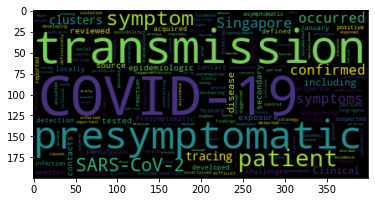

In [25]:
wcloud=WordCloud().generate_from_frequencies(filt_word)
wcloud.background_color='black'
plt.imshow(wcloud, interpolation='bilinear')
#plt.axis("off")
plt.axis("on")
(-1.5, 200, 100, -2.5)
plt.show()

In [ ]:
Extension activity

Work through chapter one of the NLTK book to see some further applications of natural language processing.

https://www.nltk.org/book/ch01.html

Advanced exercise: For the pros in the room who just can't get enough words!

The book would be a good place to start if you are just fascinated by NLP like I am!

https://www.nltk.org/book/

NLP is a huge field and just one way that we can think about structuring (and destructuring) data. If you want to 
explore this topic further on your own, here are a few additional pointers:

https://www.nltk.org/howto/sentiment.html - for discovering sentiment (e.g. extreme, strong/hate type words.)
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html - used for 
machine learning applications such as TF-IDF. You might want to do things here like finding the significance of a word across a number of texts if you're a real clever clogs!